In [167]:
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [168]:
data = pd.read_csv('AmesHousing.tsv', delimiter='\t')

In [195]:
def transform_features(df):
    #remove columns with > 25% missing values:
    missing_vals = df.isnull().sum()
    percentage = missing_vals/df.shape[0]
    gt_25 = percentage[percentage<.25]
    df = df[gt_25.index]
    
    #replace remaining missing values with mean
    df = df.fillna(df.mean())
    
    #convert garage, kitchen, heating condition to numeric scale:
    df['Garage Cond'] = df['Garage Cond'].map({'Ex':5, 'Gd':4, 'TA':3,
                                              'Fa':2, 'Po':1, 'NA':0})
    df['Kitchen Qual'] = df['Kitchen Qual'].map({'Ex':5, 'Gd':4, 'TA':3,
                                              'Fa':2, 'Po':1, 'NA':0})
    df['Heating QC'] = df['Heating QC'].map({'Ex':5, 'Gd':4, 'TA':3,
                                              'Fa':2, 'Po':1, 'NA':0})
    df['Exter Cond'] = df['Exter Cond'].map({'Ex':5, 'Gd':4, 'TA':3,
                                              'Fa':2, 'Po':1, 'NA':0})
    # new colunmn for age of house at sale:
    df['Age at Sale'] = df['Yr Sold']- df['Year Built']
    
    #convert lot shape to numeric:
    df['Lot Shape'] = df['Lot Shape'].map({'Reg':4, 'IR1':3, 
                                            'IR2':2, 'IR3':1})
    #convert utilities to numeric:
    df['Utilities'] = df['Utilities'].map({"AllPub":4, 'NoSewr':3, 
                                           'NoSeWa':2, 'ELO':1})

    #convert air condition to numeric:
    df['Central Air'] = df['Central Air'].map({'Y':1, 'N':0}, na_action='ignore')
    
    #convert Lot Config to dummy:
    dummy = pd.get_dummies(df['Lot Config'])
    concat_df = pd.concat([df, dummy], axis=1)
    df = concat_df
    
    #neighborhoods to dummy:
    
    dummy = pd.get_dummies(df['Neighborhood'])
    concat_df = pd.concat([df, dummy], axis=1)
    df = concat_df
    
    #dropping columns:
    
    cols_remove = ['Mo Sold', 'Garage Qual', 'Garage Finish', 
                   'Garage Yr Blt', 'Garage Type',
                   'Functional', 'Low Qual Fin SF', 'Electrical', 
                   'Heating', 'BsmtFin SF 2', 'Foundation',
                   'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
                   'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 
                   'BsmtFin SF 2', 'Exter Qual', 'Exterior 1st',
                   'Exterior 2nd', 'Mas Vnr Type', 'Roof Style', 
                   'Roof Matl', 'Year Remod/Add', 'Lot Shape', 'Utilities', 
                   'Kitchen Qual', 'Garage Cond','Central Air', 'Heating QC', 'Exter Cond']
    df = df.drop(columns=cols_remove)

    return df
data = transform_features(data)


KeyError: 'Garage Cond'

In [ ]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    numeric_train = train.select_dtypes(include=['integer','float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    features = numeric_train.columns.drop('SalePrice')
    
    lr = LinearRegression()
    lr.fit(df[features], df['SalePrice'])
    train_pred = lr.predict(numeric_train[features])
    rmse = np.sqrt(mean_squared_error(train_pred, numeric_train['SalePrice']))
    return rmse


# Correlations:

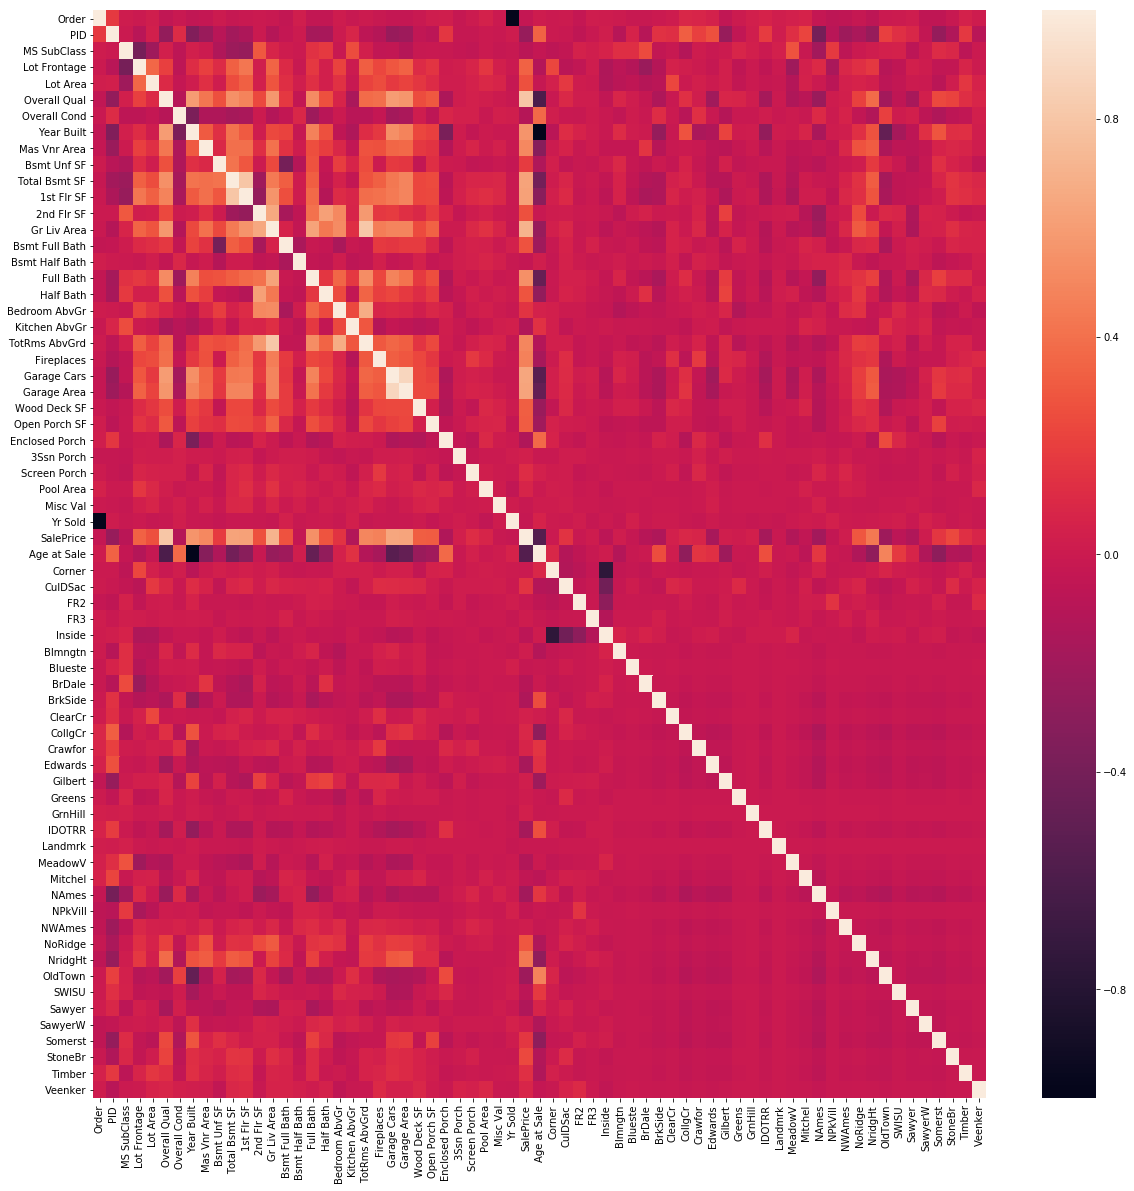

In [196]:
numeric_data = data.select_dtypes(include=['integer', 'float'])

corr_mtx = numeric_data.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_mtx)

plt.show()

# Training

In [226]:
def train_and_test(df, features):
    train = df[:1460]
    test = df[1460:]
    
    numeric_train = train.select_dtypes(include=['integer','float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    lr = LinearRegression()
    lr.fit(df[features], df['SalePrice'])
    test_pred = lr.predict(numeric_test[features])
    rmse = np.sqrt(mean_squared_error(test_pred, numeric_test['SalePrice']))
    diff = (test_pred - numeric_test['SalePrice'])/numeric_test['SalePrice']
    mean_percent_error = diff.mean()
    return rmse, mean_percent_error 
rmse={}
percent_error = {}

In [227]:
#all numeric features:
features = data.select_dtypes(include=['integer','float']).columns.drop("SalePrice")
print(features)

rmse_all_features, percent_err_all_features = train_and_test(data, features)
rmse["all features"]=rmse_all_features
percent_error['all features'] = percent_err_all_features

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Mas Vnr Area',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Yr Sold', 'Age at Sale', 'Corner', 'CulDSac',
       'FR2', 'FR3', 'Inside', 'Blmngtn', 'Blueste', 'BrDale', 'BrkSide',
       'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'Greens',
       'GrnHill', 'IDOTRR', 'Landmrk', 'MeadowV', 'Mitchel', 'NAmes',
       'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer',
       'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object')


In [228]:
#top 25 numeric features:

sales_corr = np.abs(corr_mtx['SalePrice']).sort_values(ascending=False)
sales_corr_gt_25 = sales_corr[sales_corr > .25].drop('SalePrice')

rmse_25_features, percent_err_25_features = train_and_test(data, features)
rmse["top 25 features"]=rmse_all_features
percent_error['top 25 features'] = percent_err_25_features

In [229]:
print (rmse)
print (percent_error)

{'all features': 31821.758328484517, 'top 25 features': 31821.758328484517}
{'all features': 0.011240799412906129, 'top 25 features': 0.011240799412906129}
